<a href="https://colab.research.google.com/github/theadarshkr/Feynn-Labs-Assignment/blob/main/AdarshKumar_T_1(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install seaborn scipy bioinfokit

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram
from bioinfokit.visuz import cluster

In [3]:
#Loading the data
data = pd.read_csv("mcdonalds.csv")

In [4]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
data.shape

(1453, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


**Step 1: Segment or Not?**
McDonald’s chooses to segment the market into more targeted segments to efficiently advertise the brand.

**Step 2: Specify the Target Segment**
McDonald’s aims to target segments that find the brand favorable, eat at McDonald’s frequently and are open to fast food.

**Step 3: Collecting Data**
The data is already collected

**Step 4: Exploring Data**

In [7]:
#STEP 4: Exploring Data

#Extracting the first eleven columns from the data set containing the segmentation variables
MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)
mean=round(MD.mean(),2)
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [8]:
#Principal Components Analysis, and creating a perceptual map to gain insights into how attributes are rated by respondents and which attributes tend to be rated in the same way
#Factor-Cluster Analysis
pca = PCA()
MD_pca = pca.fit_transform(MD)
MD_p = pca.fit(MD)

SD = np.sqrt(pca.explained_variance_)
PV = pca.explained_variance_ratio_
index = ["PC{}".format(i) for i in range(1, len(SD) + 1)]

sum_df = pd.DataFrame({
    "Standard deviation": SD,
    "Proportion of Variance": PV,
    "Cumulative Proportion": PV.cumsum()
}, index=index)
sum_df

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [9]:
print("Standard Deviation:\n", SD.round(1))
load = pca.components_
rotational_matrix = MD_p.components_.T

rotational_df = pd.DataFrame(rotational_matrix, index=MD.columns.values, columns=index)
rotational_df = round(-rotational_df, 3)
rotational_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


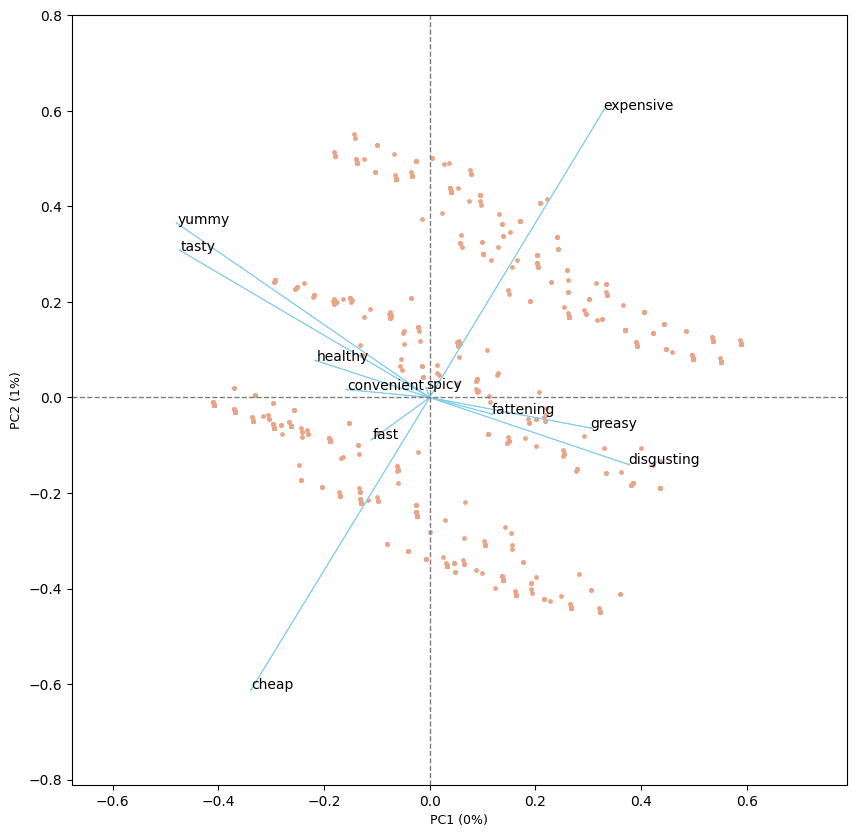

In [10]:
# Plot the data to visualize the clusters
cluster.biplot(cscore=MD_pca, loadings=pca.components_, labels=data.columns.values, var1=0, var2=1, show=True,dim=(10, 10))

**Step5:Extracting Segments**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

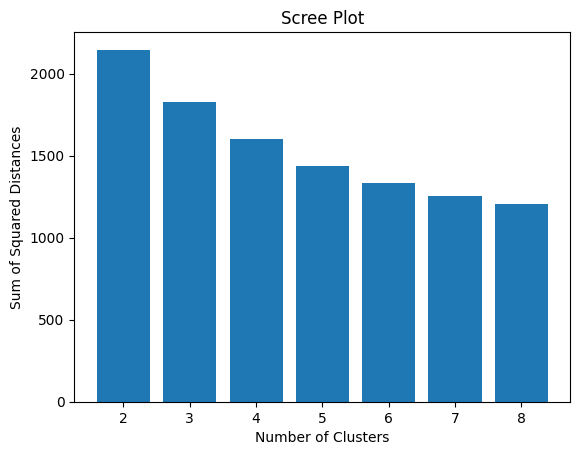

In [11]:
#Step 5: Extracting Segments
#Step 5.1: Using k-Means

#Creating a list to store the KMeans models
kmeans_models = []

#Looping over the list of cluster numbers
for k in range(2, 9):
    #Creating a KMeans object with k clusters
    kmeans = KMeans(n_clusters=k)
    #Fitting the KMeans object to the data
    kmeans.fit(MD)
    #Appending the model to the list
    kmeans_models.append(kmeans)

#Extracting the cluster labels for the four-cluster model
cluster_labels = kmeans_models[2].labels_

#Creating a scree plot to determine the optimal number of clusters
plt.bar(range(2, 9), [model.inertia_ for model in kmeans_models])
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Scree Plot')
plt.show()

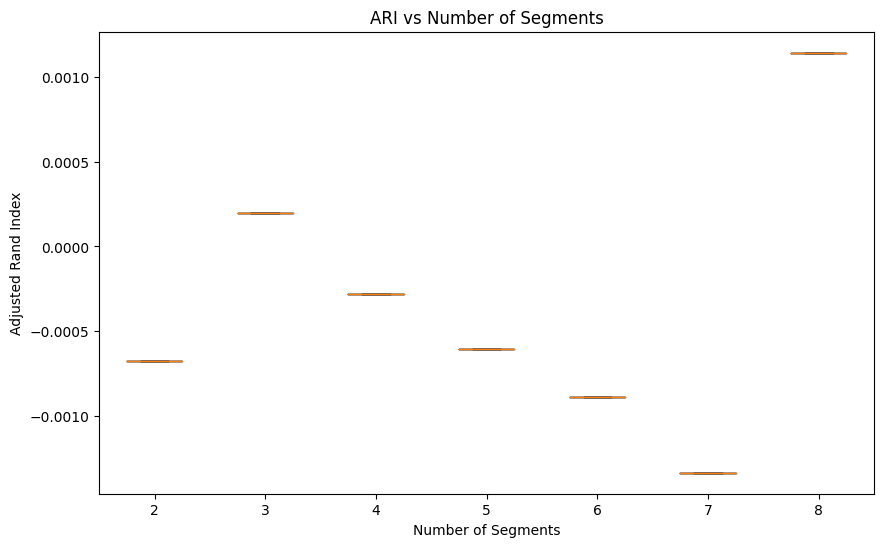

In [12]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

#Setting the random seed
np.random.seed(1234)

#Defining the number of bootstrap samples
nboot = 100

#Defining the number of random initialisations for KMeans
nrep = 10

#Defining the list to store the bootstrap samples
bootstrap_samples = []

#Looping over the number of bootstrap samples
for _ in range(nboot):
    #Generating a bootstrap sample with replacement
    sample = resample(MD.values, random_state=1234)
    #Appending the sample to the list
    bootstrap_samples.append(sample)

#Defining the list to store the ARI values
ari = []

#Defining the range of cluster numbers
num_segments = range(2, 9)

#Looping over the list of cluster numbers
for k in num_segments:
    #Defining the list to store the ARI values for each cluster number
    ari_k = []
    #Looping over the list of bootstrap samples
    for sample in bootstrap_samples:
        #Creating a KMeans object with k clusters and nrep random initialisations
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        #Fitting the KMeans object to the sample
        kmeans.fit(sample)
        #Predicting the cluster labels for the sample
        cluster_labels = kmeans.predict(sample)
        #Predicting the cluster labels for the original data
        true_labels = kmeans.predict(MD.values)
        #Computing the ARI for each model
        ari_model = adjusted_rand_score(true_labels, cluster_labels)
        #Appending the ARI value to the list
        ari_k.append(ari_model)
    # Appending the list of ARI values to the list
    ari.append(ari_k)

#Creating a plot of ARI vs number of segments
plt.figure(figsize=(10, 6))
plt.boxplot(ari, labels=list(num_segments), whis=10)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('ARI vs Number of Segments')
plt.show()

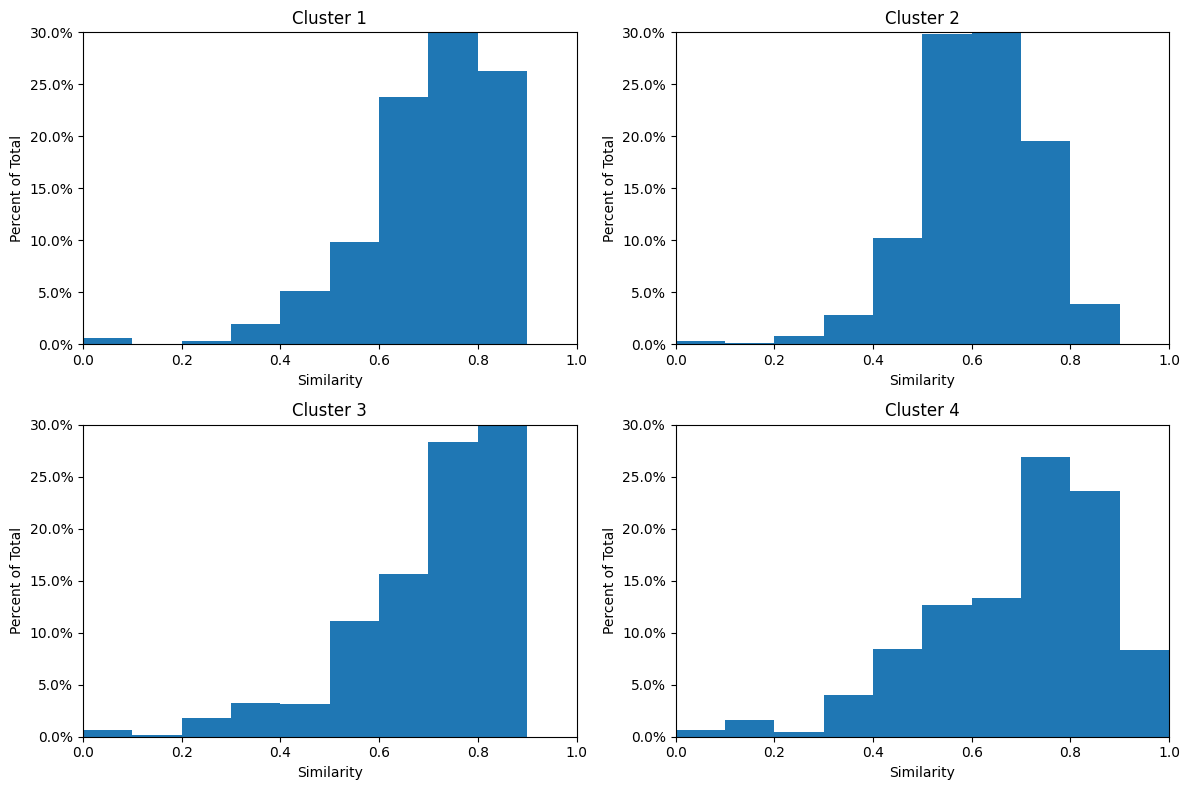

In [13]:
#Histograms for the Clusters
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.metrics.pairwise import cosine_similarity

range_values = (0, 1)
num_bins = 10
max_frequency = 0.3

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(1, 5):
    #Getting cluster labels for each cluster
    cluster_labels = kmeans_models[i-1].labels_

    #Calculating similarity (cosine similarity in this case)
    similarity_matrix = cosine_similarity(MD)
    similarities = similarity_matrix[cluster_labels == (i-1), :].mean(axis=0)

    row = (i - 1) // 2
    col = (i - 1) % 2

    #Using weights to get the percentage of the data
    #Assigning a weight of 1/len(similarities) to each data point
    weights = np.ones_like(similarities) / len(similarities)
    axs[row, col].hist(similarities, bins=num_bins, range=range_values, weights=weights)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Percent of Total')
    axs[row, col].set_title(f'Cluster {i}')

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)

    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

    #Multiplying the y-axis values by 100 to get the percentage
    yticks = mtick.PercentFormatter(xmax=1)
    axs[row, col].yaxis.set_major_formatter(yticks)

plt.tight_layout()
plt.show()

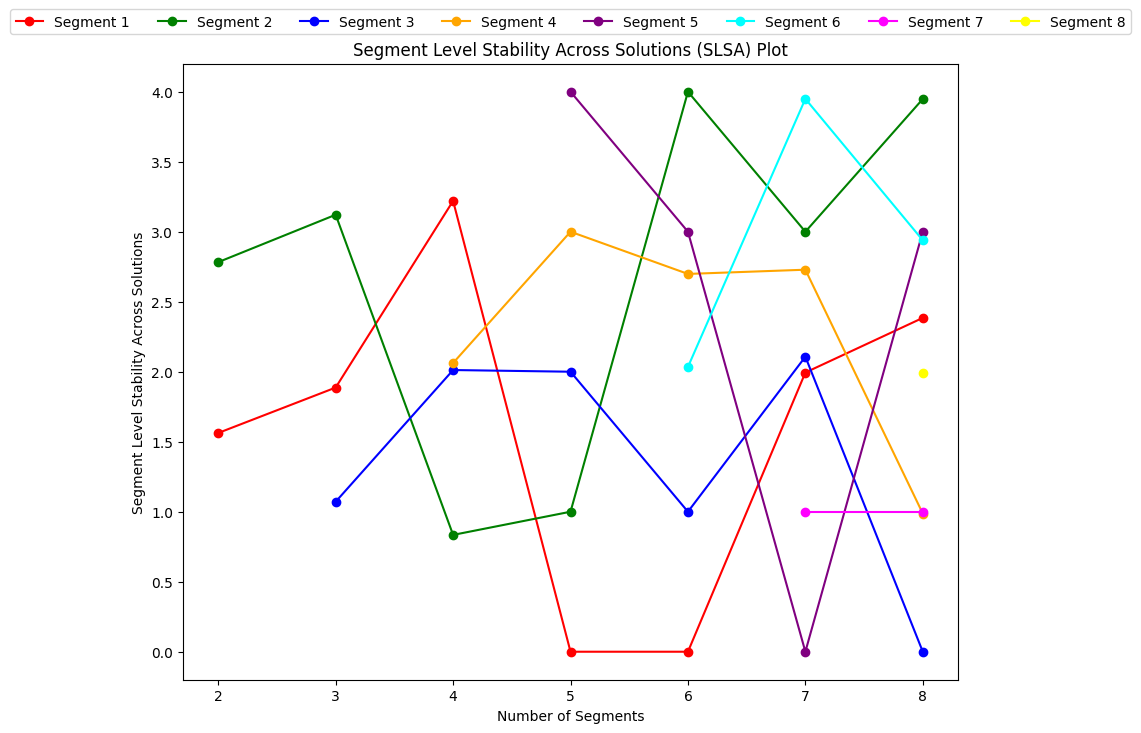

In [14]:
#Segment Level Stability Across Solutions

#Using a loop to calculate mean for each segment
mean_values = []

#Using the maximum number of clusters among the models
max_clusters = max(model.n_clusters for model in kmeans_models)

for model in kmeans_models:
    segment_means = [np.mean(cluster_labels[model.labels_ == i]) for i in range(model.n_clusters)]
    #Padding the segment_means with NaN values to match the max_clusters
    segment_means.extend([np.nan] * (max_clusters - model.n_clusters))
    mean_values.append(segment_means)

#Converting to NumPy array
mean_values = np.array(mean_values)

#Plotting SLSA
plt.figure(figsize=(10, 8))
#Defining a list of colors for each segment
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow']
for i in range(max_clusters):
    #Using the label argument to assign a label to each segment
    plt.plot(range(2, 2 + len(mean_values)), mean_values[:, i], marker='o', label=f'Segment {i + 1}', color=colors[i])

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability Across Solutions')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
#Using the legend function to customize the legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=8, fontsize=10)
plt.show()

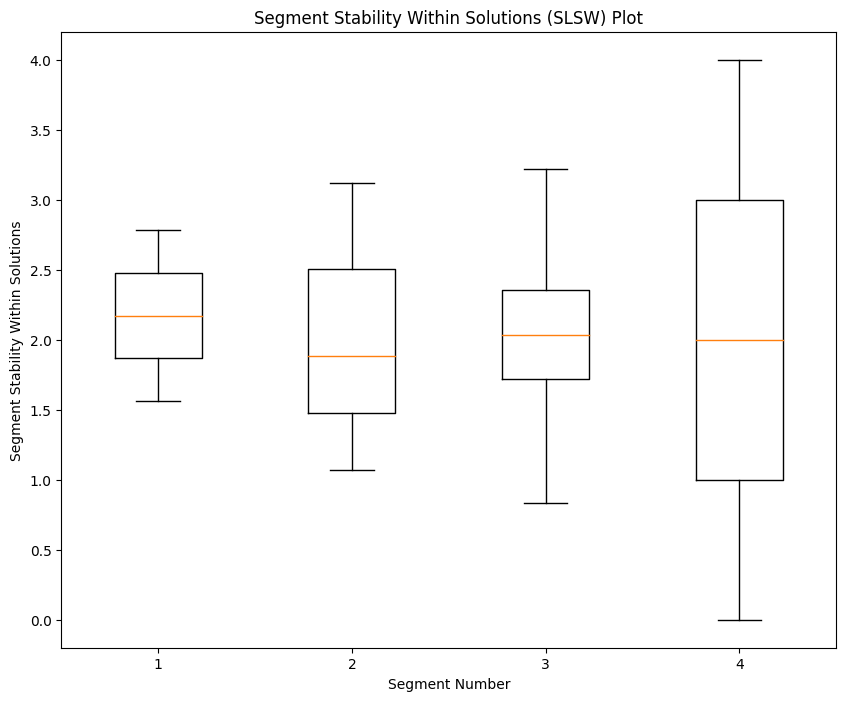

In [15]:
#Segment Stability Within Solutions

#Using a loop to calculate the stability for each segment
segment_stabilities = []

for model in kmeans_models:
    #Calculating the stability for each segment (using cluster labels)
    cluster_stabilities = [np.mean(cluster_labels[model.labels_ == i]) for i in range(model.n_clusters)]
    segment_stabilities.append(cluster_stabilities)

#Creating a box plot for each segment
plt.figure(figsize=(10, 8))
#Using slicing to select the segments from 1 to 4
labels = list(range(1, 5))
plt.boxplot(segment_stabilities[:4], labels=labels)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability Within Solutions')
plt.title('Segment Stability Within Solutions (SLSW) Plot')
plt.show()

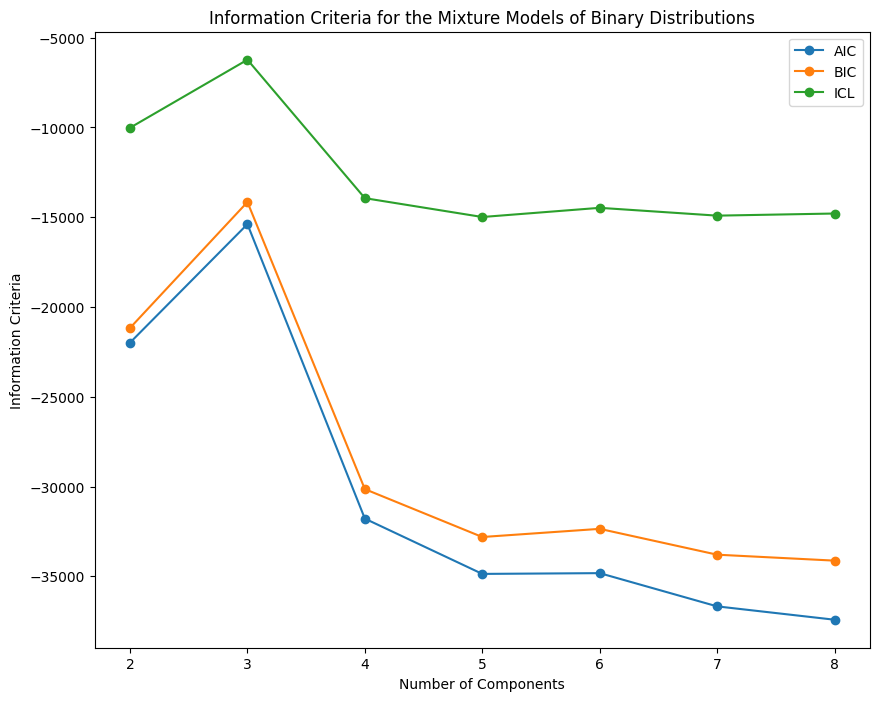

In [16]:
#Step 5.2: Using Mixtures of Distributions

#Creating a list to store the GaussianMixture models
gmm_models = []

#Looping over the list of component numbers
for k in range(2, 9):
    #Creating a GaussianMixture object with k components
    gmm = GaussianMixture(n_components=k)
    #Fitting the GaussianMixture object to the data
    gmm.fit(MD)
    #Appending the model to the list
    gmm_models.append(gmm)

#Extracting the cluster labels for the four-component model
cluster_labels = gmm_models[2].predict(MD)

#Creating a plot to show the information criteria (AIC, BIC, ICL) for the mixture models of binary distributions with 2 to 8 components
plt.figure(figsize=(10, 8))
plt.plot(range(2, 9), [gmm.aic(MD) for gmm in gmm_models], marker='o', label='AIC')
plt.plot(range(2, 9), [gmm.bic(MD) for gmm in gmm_models], marker='o', label='BIC')
plt.plot(range(2, 9), [np.sum(gmm.score_samples(MD)) + gmm.bic(MD) for gmm in gmm_models], marker='o', label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Information Criteria')
plt.title('Information Criteria for the Mixture Models of Binary Distributions')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


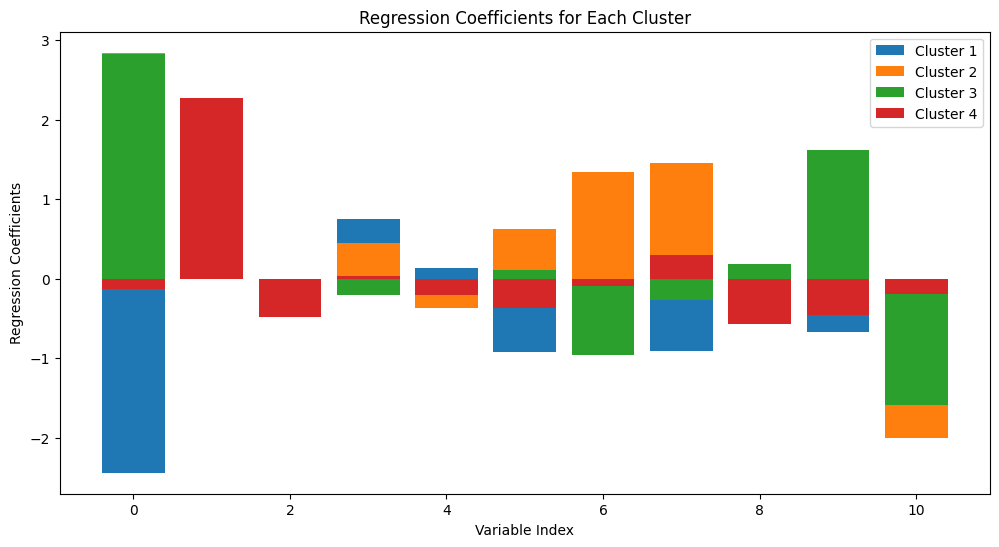

In [17]:
#Step 5.3: Using Mixtures of Regression Models

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Label encoding for 'Like' Column
label_encoder = LabelEncoder()
data['Like'] = label_encoder.fit_transform(data['Like'])
data['Like.n'] = 5 - data['Like']

# Cluster labels taken from KMeans
kmeans = KMeans(n_clusters=4, random_state=1234)
cluster_labels = kmeans.fit_predict(MD)

# Ensuring 'y' and 'cluster_labels' have the same size
if len(MD) != len(cluster_labels):
    raise ValueError("Size mismatch between 'MD' and 'cluster_labels'.")

# 'k' is the number of components from our clustering
k = len(np.unique(cluster_labels))

# Creating an empty list to store linear regression models
linear_models = []

# Fitting linear regression models for each cluster
for cluster_num in range(k):
    # Selecting data points belonging to the current cluster
    cluster_X = MD[cluster_labels == cluster_num].values
    cluster_y = data['Like.n'][cluster_labels == cluster_num].values

    # Creating a linear regression model
    linear_model = LinearRegression()

    # Fitting the model to the cluster data
    linear_model.fit(cluster_X, cluster_y)

    # Appending the model to the list
    linear_models.append(linear_model)

# Visualizing the regression coefficients for each cluster
plt.figure(figsize=(12, 6))
for cluster_num, model in enumerate(linear_models):
    plt.bar(range(len(model.coef_)), model.coef_, label=f'Cluster {cluster_num + 1}')

plt.xlabel('Variable Index')
plt.ylabel('Regression Coefficients')
plt.title('Regression Coefficients for Each Cluster')
plt.legend()
plt.show()

**Step 6: Profiling Segments**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


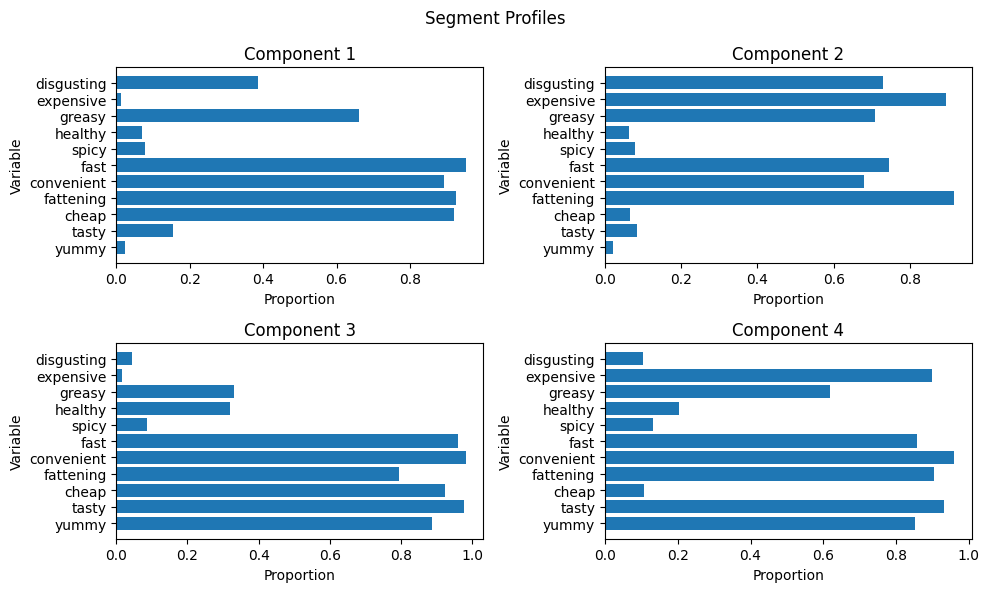

In [18]:
#STEP 6: Profiling Segments

#We've already performed KMeans clustering
kmeans_model = KMeans(n_clusters=4)
cluster_labels = kmeans_model.fit_predict(MD.iloc[:, :12])  #Since, first 11 columns are segmentation variables

MD['labels'] = cluster_labels

#Hierarchical Clustering to easily interpret the Segment Profile Plot, and position similar attribute close to one another
MD_vclust = linkage(MD.iloc[:, :11].T, method='complete', metric='euclidean')

#Creating the Segment Profile Plot
MD_mean = MD.groupby('labels').mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
for i in range(4):
    #Getting the order of the attributes based on the hierarchical clustering
    attribute_order = dendrogram(MD_vclust, labels=MD.iloc[:, :11].columns, no_plot=True)['ivl']
    #Plotting the bars for each segment using the attribute order
    axs[i // 2, i % 2].barh(range(len(attribute_order)), MD_mean[attribute_order].iloc[i])
    axs[i // 2, i % 2].set_title(f'Component {i + 1}')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(len(attribute_order)))
    ax.set_yticklabels(attribute_order)

fig.suptitle('Segment Profiles')
fig.tight_layout()
plt.show()

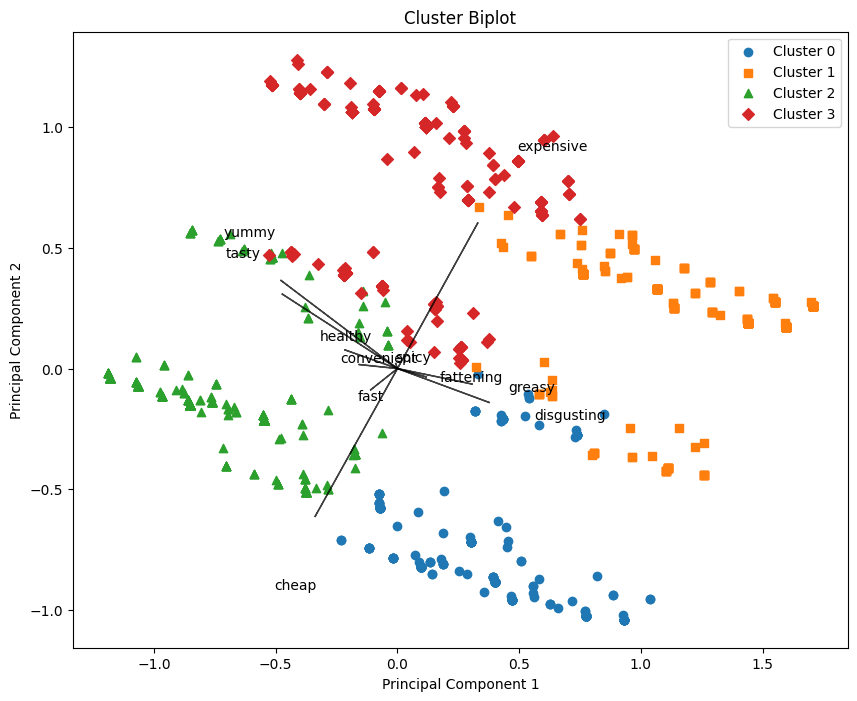

In [19]:
# Creating the Segment Separation Plot using PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD.iloc[:, :11])

# Define different shapes for each cluster
shapes = ['o', 's', '^', 'D']

# Plotting the scatter plot with different shapes
plt.figure(figsize=(10, 8))
for cluster_num in np.unique(cluster_labels):
    cluster_mask = (cluster_labels == cluster_num)
    plt.scatter(MD_pca[cluster_mask, 0], MD_pca[cluster_mask, 1], label=f'Cluster {cluster_num}', marker=shapes[cluster_num])

# Plotting arrows for variable loadings
for i in range(pca.components_.shape[1]):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='black', alpha=0.7)
    plt.text(pca.components_[0, i] * 1.5, pca.components_[1, i] * 1.5, MD.columns[i], color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Biplot')
plt.legend()
plt.show()

**Step 7: Describing Segments**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


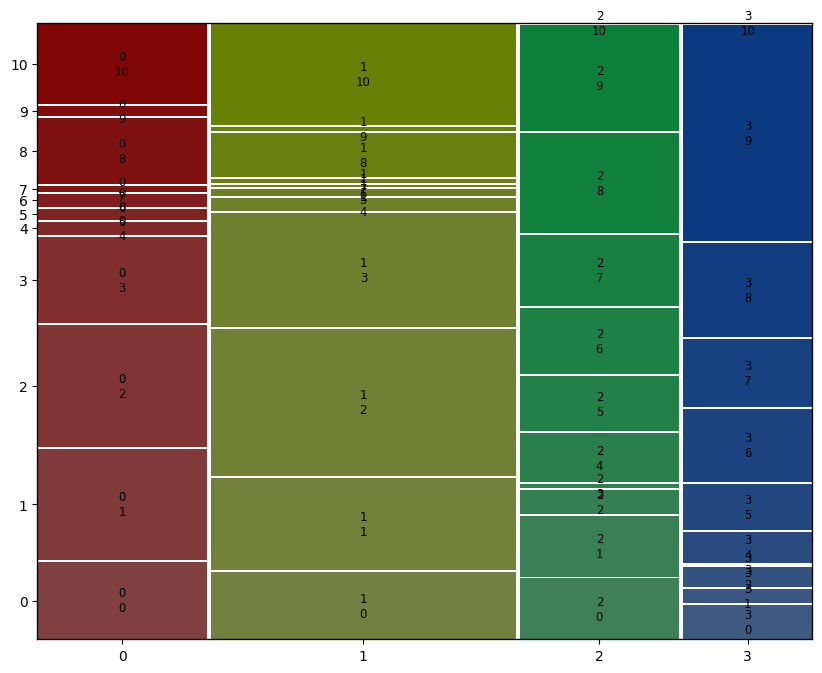

In [20]:
#Step 7: Describing Segments

from statsmodels.graphics.mosaicplot import mosaic

#Creating DataFrame for clustering
df_eleven = MD.loc[:, ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
                       'tasty', 'expensive', 'healthy', 'disgusting']]

#K-Means Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
MD['cluster_num'] = kmeans.labels_

#Mosaic plot for association between segment membership and liking or disliking McDonald’s
crosstab = pd.crosstab(MD['cluster_num'], data['Like'])
#Assuming 'Like' column contains numerical labels (0, 1, 2, etc.) in data DataFrame

plt.rcParams['figure.figsize'] = (10, 8)
mosaic(crosstab.stack())
plt.show()


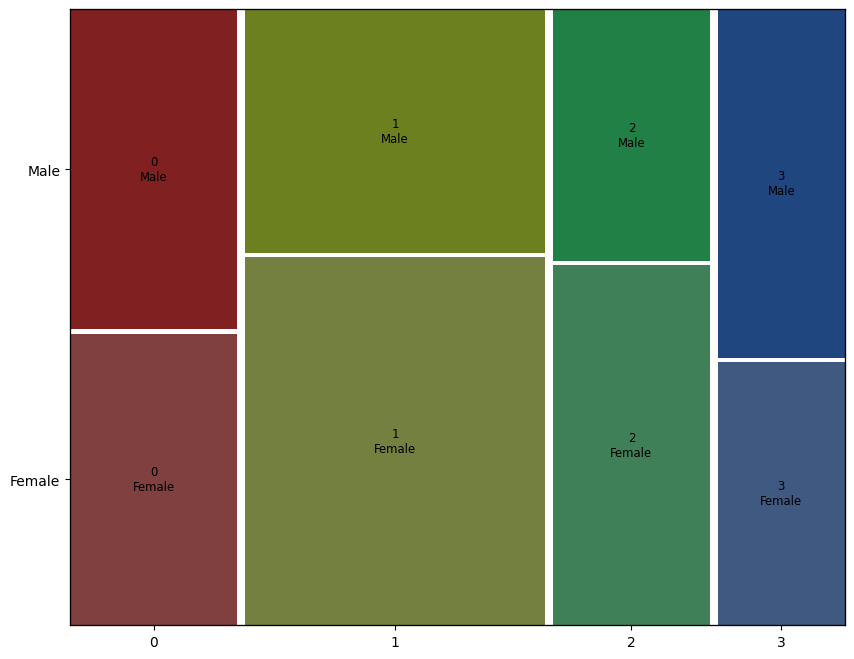

In [21]:
#Mosaic plot for gender distribution across segments
ct = pd.crosstab(MD['cluster_num'], data['Gender'])
mosaic(ct.stack(), gap=0.01)
plt.show()

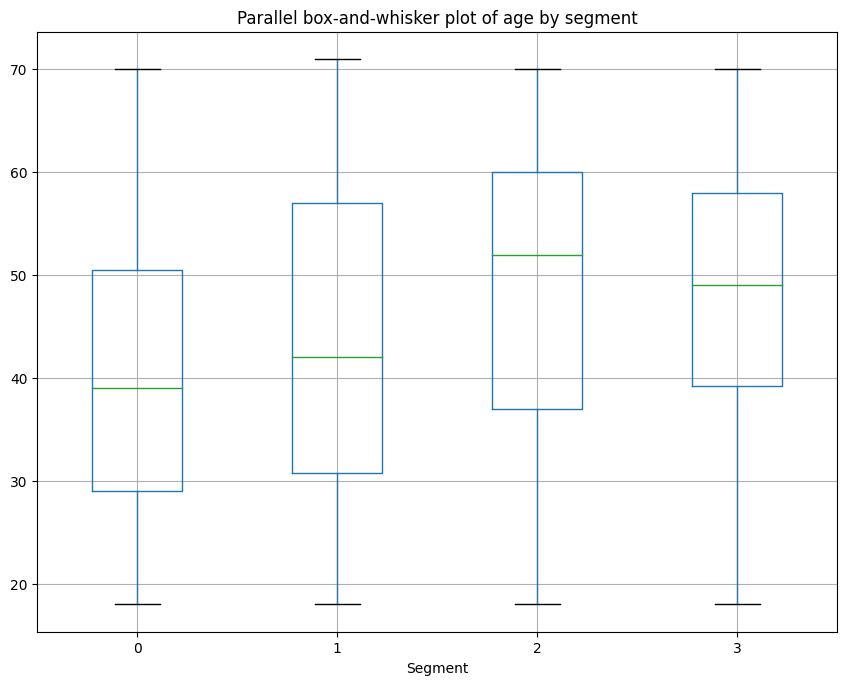

In [22]:
#Parallel box-and-whisker plot for age across segments
df = pd.DataFrame({'Segment': MD['cluster_num'], 'Age': data['Age']})
df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

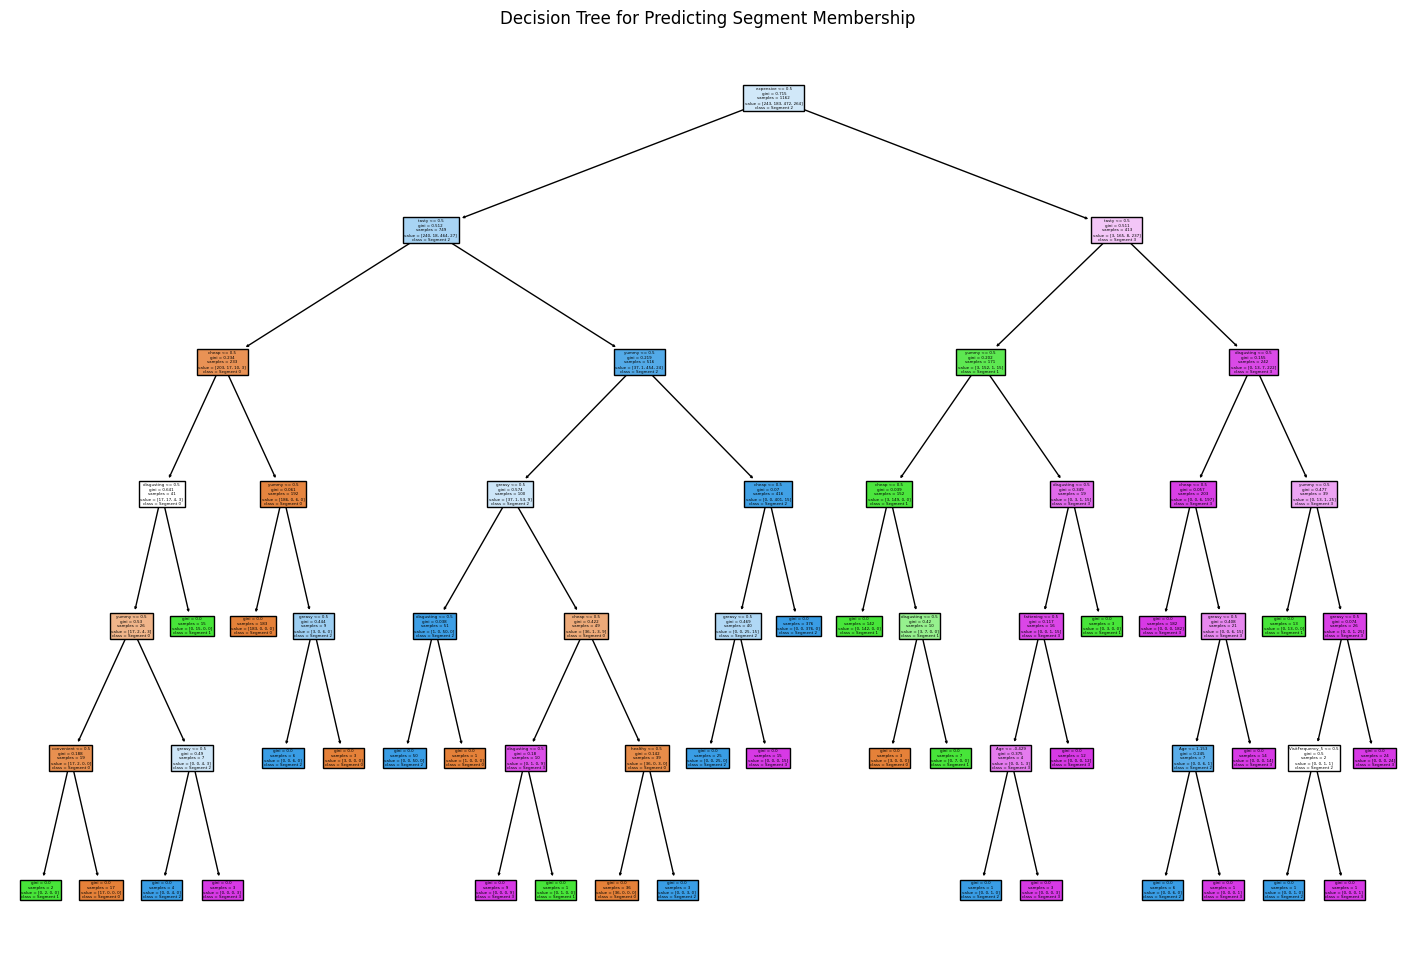

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#Selecting features for the decision tree model from the label-encoded DataFrame 'data'
X = data[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
          'tasty', 'expensive', 'healthy', 'disgusting', 'Age', 'VisitFrequency', 'Gender']]

#Applying Label Encoding
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
data[categorical_columns] = data[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

#Adding one-hot encoding for 'VisitFrequency' in 'data'
X = pd.get_dummies(X, columns=['VisitFrequency'], drop_first=True)

#Scaling numerical variables in 'data'
numerical_cols = ['Age']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

#Adding 'labels' column to the data DataFrame
data['labels'] = MD['labels']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['labels'], test_size=0.2, random_state=42)

#Fitting a Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

#Visualizing the Decision Tree
plt.figure(figsize=(18, 12))
plot_tree(tree_classifier, filled=True, feature_names=X.columns, class_names=[f"Segment {i}" for i in range(4)])
plt.title('Decision Tree for Predicting Segment Membership')
plt.show()

**Step 8: Selecting (the) Target Segment(s)**

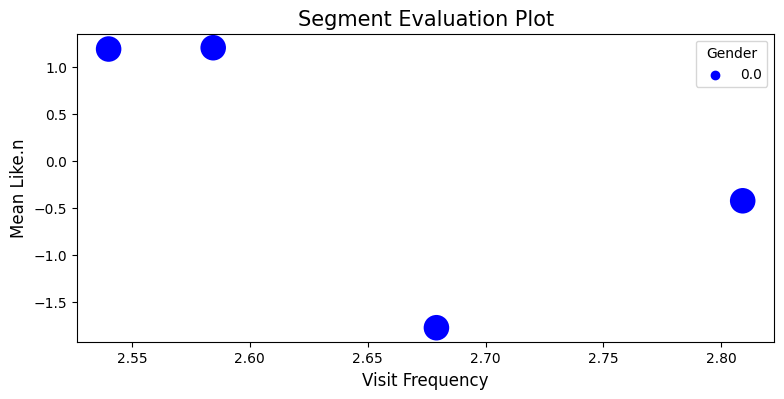

In [26]:
#Step 8: Selecting (the) Target Segment(s)

#Segment Evaluation Plot

#Calculating mean values for 'VisitFrequency', 'Like.n', and 'Gender' for each segment
visit_mean = data.groupby('labels')['VisitFrequency'].mean().reset_index(name='VisitFrequency')
like_mean = data.groupby('labels')['Like.n'].mean().reset_index(name='Like.n')
gender_mean = data.groupby('labels')['Gender'].apply(lambda x: (x == 'Female').mean()).reset_index(name='Gender')

#Merging the data for a unified segment DataFrame
segment = gender_mean.merge(like_mean, on='labels', how='left').merge(visit_mean, on='labels', how='left')

#Creating the segment evaluation plot using seaborn
plt.figure(figsize=(9, 4))
sns.scatterplot(x='VisitFrequency', y='Like.n', data=segment, s=400, hue='Gender', palette={0: 'blue', 1: 'red'})
plt.title("Segment Evaluation Plot", fontsize=15)
plt.xlabel("Visit Frequency", fontsize=12)
plt.ylabel("Mean Like.n", fontsize=12)
plt.legend(title='Gender', loc='upper right')
plt.show()
